In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams.update(plt.rcParamsDefault)

training_set = "../data/adult_train.csv"
test_set = "../data/adult_test.csv"

train_data = pd.read_csv(training_set)
test_data = pd.read_csv(test_set)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Preprocessing 

One reference of preprocessing:

https://rpubs.com/juliaHuynh/datapreprocess-assignment3

## 1.1 Examine the dataset
- check training and test labels
- check training and test features, including numerical and categorical features

In [2]:
train_y = train_data["label"].str.strip()
print("training labels:")
print(train_y.value_counts())

print("-"*50)

test_y = test_data["label"].str.strip()
print("test labels:")
print(test_y.value_counts())

print("-"*50)

all_data = [train_data, test_data]

training labels:
<=50K    24720
>50K      7841
Name: label, dtype: int64
--------------------------------------------------
test labels:
<=50K.    12435
>50K.      3846
Name: label, dtype: int64
--------------------------------------------------


In [3]:
train_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
test_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


- remove all whitespace in categorical features

In [5]:
for d in all_data:
    for f in d.columns:
        if d[f].dtype == "object":
            d[f] = d[f].str.strip()

In [6]:
train_data = train_data.where(train_data != "?")
test_data = test_data.where(test_data != "?")
all_data = [train_data, test_data]

/usr/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  label           16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


We regard "?" as NaN and use mode of each feature to fill these nans.

In [9]:
for d in all_data:
    for f in ["workclass", "occupation", "native-country"]:
        d[f].fillna(d[f].mode()[0], inplace = True)

In [10]:
for d in all_data:
    print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns

### 1.2 Check distribution of numerical features

In [11]:
from scipy.stats import norm, skew, probplot

numerical_features = train_data.dtypes[train_data.dtypes != "object"].index
skew_features = train_data[numerical_features].apply(skew).sort_values(ascending = True)
skewness = pd.DataFrame({"Skew": skew_features})
skewness

,Skew
education-num,-0.311662
hours-per-week,0.227632
age,0.558718
fnlwgt,1.446913
capital-loss,4.594417
capital-gain,11.953297


- transform skew features with boxcox

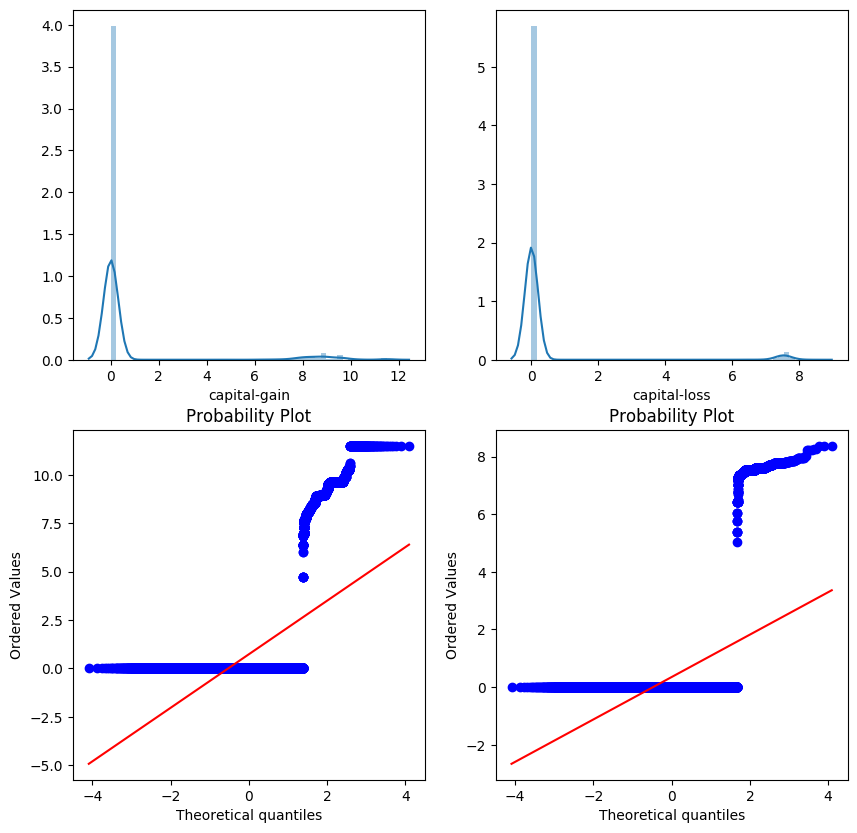

In [12]:
from scipy.special import boxcox1p
Lambda = 0
for d in all_data:
    for f in ["capital-gain", "capital-loss"]:
        d[f] = boxcox1p(d[f], Lambda)
        
f, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.distplot(train_data["capital-gain"], ax = ax[0][0])
sns.distplot(train_data["capital-loss"], ax = ax[0][1])

probplot(train_data["capital-gain"], plot = ax[1][0])
probplot(train_data["capital-loss"], plot = ax[1][1])
plt.show()

## 1.3 Encoding features

- For categorical features
    - Cannot find an elegant approach (i.e., in no more than 2 lines) to use `sklearn.preprocessing.OneHotEncoder`, so I just use `pd.get_dummies` instead

- For numerical features (and <span style="color:red"> **numerical representation of encoded categorical features** </span> <- This stuck me for several days; if not doing this, the performace of LR will be unacceptably bad as the model will be highly overfitted.)
    - Scale each feature by StandardScaler, i.e., subtracted by mean and divided by std


- 1.3.1 Handle the labels

In [13]:
train_data["label"] = train_data["label"].str.strip().replace({"<=50K": 0, ">50K": 1})
test_data["label"] = test_data["label"].str.strip().replace({"<=50K.": 0, ">50K.": 1})

train_data["label"].value_counts()

0    24720
1     7841
Name: label, dtype: int64

- 1.3.2 It seems that the `education` feature and the `education-num` feature are highly correlated. Here we check the duplicates in these two columns:

In [14]:
for d in all_data:
    print(d[["education", "education-num"]].drop_duplicates().sort_values(by = "education"))

        education  education-num
77           10th              6
3            11th              7
415          12th              8
160       1st-4th              2
56        5th-6th              3
15        7th-8th              4
6             9th              5
13     Assoc-acdm             12
14      Assoc-voc             11
0       Bachelors             13
20      Doctorate             16
2         HS-grad              9
5         Masters             14
224     Preschool              1
52    Prof-school             15
10   Some-college             10
        education  education-num
5            10th              6
0            11th              7
173          12th              8
323       1st-4th              2
37        5th-6th              3
9         7th-8th              4
54            9th              5
2      Assoc-acdm             12
41      Assoc-voc             11
11      Bachelors             13
19      Doctorate             16
1         HS-grad              9
15        

So there is a bijection between `education` and `education-num`. Let's drop the column `education` since it more a numerical feature.

In [15]:
for d in all_data:
    d.drop("education", axis = 1, inplace = True)

In [16]:
X_train = all_data[0].drop("label", axis = 1)
y_train = all_data[0]["label"]
X_test = all_data[1].drop("label", axis = 1)
y_test = all_data[1]["label"]

In [17]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

We found that the shape of `X_train` and `X_test` do not agree. There is one feature in `X_train` but not in `X_test`. Let's drop it.

In [18]:
set(X_train.columns) - set(X_test.columns)

{'native-country_Holand-Netherlands'}

In [19]:
X_train.drop("native-country_Holand-Netherlands", axis = 1, inplace = True)

- Standardize features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [22]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030671,-1.063611,1.134739,2.831370,-0.221075,-0.035429,-0.174295,-0.262097,-0.014664,-1.747977,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
1,0.837109,-1.008707,1.134739,-0.299271,-0.221075,-2.222153,-0.174295,-0.262097,-0.014664,-1.747977,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
2,-0.042642,0.245079,-0.420060,-0.299271,-0.221075,-0.035429,-0.174295,-0.262097,-0.014664,0.572090,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
3,1.057047,0.425801,-1.197459,-0.299271,-0.221075,-0.035429,-0.174295,-0.262097,-0.014664,0.572090,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
4,-0.775768,1.408176,1.134739,-0.299271,-0.221075,-0.035429,-0.174295,-0.262097,-0.014664,0.572090,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-3.255119,-0.045408,-0.022173


In [24]:
X_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,...,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,-1.001625e-16,1.471887e-16,3.420582e-17,1.920327e-17,-1.549355e-17,-3.927941e-17,-5.673693e-18,-2.836846e-18,-1.213297e-16,...,-1.636642e-17,1.571176e-17,7.310335e-18,1.549355e-17,0.000000,2.618627e-18,-8.728758e-18,-9.034265e-17,2.302210e-17,5.237255e-18
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.681631e+00,-3.529656e+00,-2.992712e-01,-2.210745e-01,-3.194030e+00,-1.742951e-01,-2.620974e-01,-1.466381e-02,-1.747977e+00,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,-3.255119e+00,-4.540836e-02,-2.217266e-02
25%,-7.757679e-01,-6.816910e-01,-4.200596e-01,-2.992712e-01,-2.210745e-01,-3.542945e-02,-1.742951e-01,-2.620974e-01,-1.466381e-02,5.720899e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,3.072085e-01,-4.540836e-02,-2.217266e-02
50%,-1.159546e-01,-1.082193e-01,-3.136003e-02,-2.992712e-01,-2.210745e-01,-3.542945e-02,-1.742951e-01,-2.620974e-01,-1.466381e-02,5.720899e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,3.072085e-01,-4.540836e-02,-2.217266e-02
75%,6.904838e-01,4.478765e-01,7.460392e-01,-2.992712e-01,-2.210745e-01,3.695194e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,5.720899e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-0.039607,-2.351838e-02,-2.416321e-02,3.072085e-01,-4.540836e-02,-2.217266e-02
max,3.769612e+00,1.226856e+01,2.300838e+00,4.390885e+00,5.067180e+00,4.742967e+00,5.737396e+00,3.815376e+00,6.819510e+01,5.720899e-01,...,2.964839e+01,1.687077e+01,5.208087e+01,2.014975e+01,25.247792,4.251993e+01,4.138522e+01,3.072085e-01,2.202238e+01,4.510058e+01


# 2. (Problem 1a) Fit logistic regression model with gradient descent; (Problem 2a) Metrics of the fitted model

In [34]:
from optimizer import Logistic_Regression

LRM = Logistic_Regression()

w0 = np.zeros((X_train.shape[1]+1, 1))
num_iter = 10000
lr = 1e-2

w, hist = LRM.fit(solver = "GD", 
                  X = X_train.to_numpy(), 
                  y = y_train.to_numpy().reshape((-1, 1)), 
                  w0 = w0, num_iter = num_iter, lr = lr, 
                  test_X = X_test.to_numpy(), 
                  test_y = y_test.to_numpy().reshape((-1, 1)), 
                  debug = True)

Iteration: 0, training loss: 0.6931471805599453
Iteration: 1000, training loss: 0.360147382869058
Iteration: 2000, training loss: 0.34037754264625836
Iteration: 3000, training loss: 0.33503800980157644
Iteration: 4000, training loss: 0.33296175652357224
Iteration: 5000, training loss: 0.33199952041259195
Iteration: 6000, training loss: 0.33150211520324374
Iteration: 7000, training loss: 0.3312236585461949
Iteration: 8000, training loss: 0.33105743740034477
Iteration: 9000, training loss: 0.33095262705035017


In [88]:
print(w)

[[-2.10857453e+00]
 [ 3.17783533e-01]
 [ 7.06103939e-02]
 [ 7.73203593e-01]
 [ 5.02416753e-01]
 [ 2.40709785e-01]
 [ 3.91083257e-01]
 [ 1.00465592e-01]
 [-1.08696128e-02]
 [-2.46003693e-02]
 [ 1.64248050e-02]
 [ 5.61341996e-02]
 [-8.98874858e-02]
 [-2.98806079e-02]
 [-6.28804266e-02]
 [-8.62230608e-02]
 [ 3.16342177e-02]
 [ 4.08869104e-01]
 [-3.37232583e-02]
 [-3.30882425e-01]
 [-6.39966656e-02]
 [-2.72985926e-02]
 [-1.59420054e-02]
 [-1.92588226e-02]
 [ 1.53371642e-02]
 [ 2.39864519e-01]
 [-1.74270341e-01]
 [-1.40162155e-01]
 [-8.01326277e-02]
 [-2.44716313e-01]
 [-9.23733638e-02]
 [ 9.50531934e-02]
 [ 6.56768582e-02]
 [ 7.31738576e-02]
 [ 9.17167225e-02]
 [-2.72828370e-02]
 [ 2.12552997e-01]
 [-3.36417803e-02]
 [-8.84829719e-02]
 [-3.41001878e-01]
 [-8.39889613e-02]
 [ 3.49836981e-01]
 [-3.87370043e-02]
 [ 1.66495141e-02]
 [-2.42321446e-02]
 [-3.31369267e-02]
 [ 3.11437969e-02]
 [-1.76422656e-01]
 [ 1.76422656e-01]
 [ 3.26440142e-02]
 [ 1.82984831e-02]
 [-2.46050547e-02]
 [-8.1082194

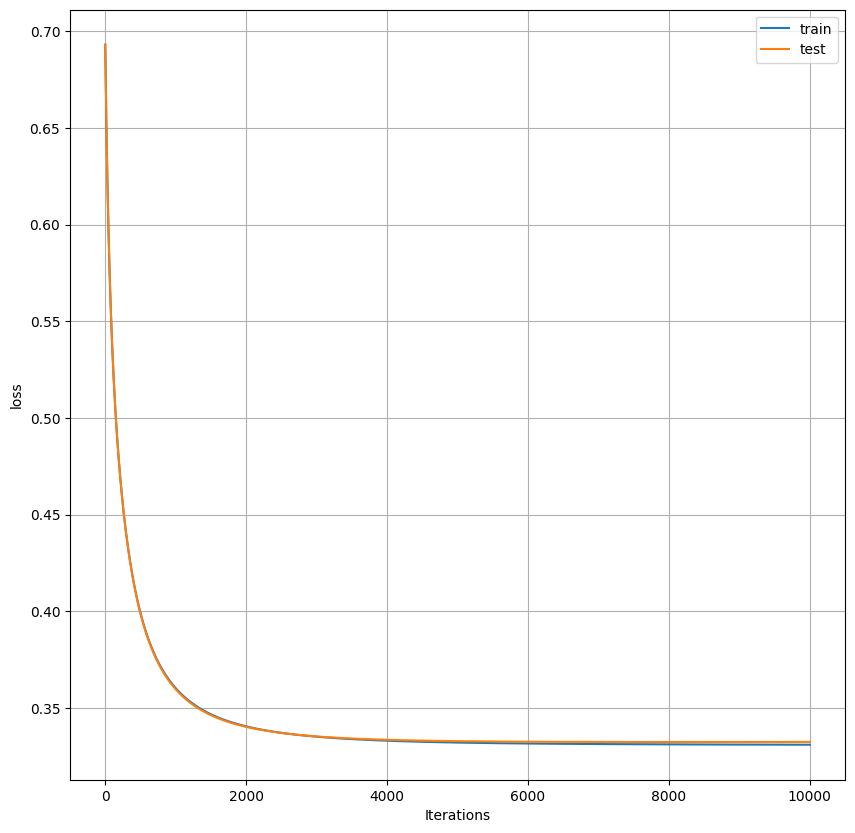

In [36]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

f, ax = plt.subplots(1, 1, figsize = (10, 10))

xx = np.arange(len(hist["train"]))
ax.plot(xx, hist["train"], label = "train")
ax.plot(xx, hist["test"], label = "test")
ax.legend()
ax.grid()
ax.set_xlabel("Iterations")
ax.set_ylabel("loss")
plt.show()

f1 score: 0.642551979493022


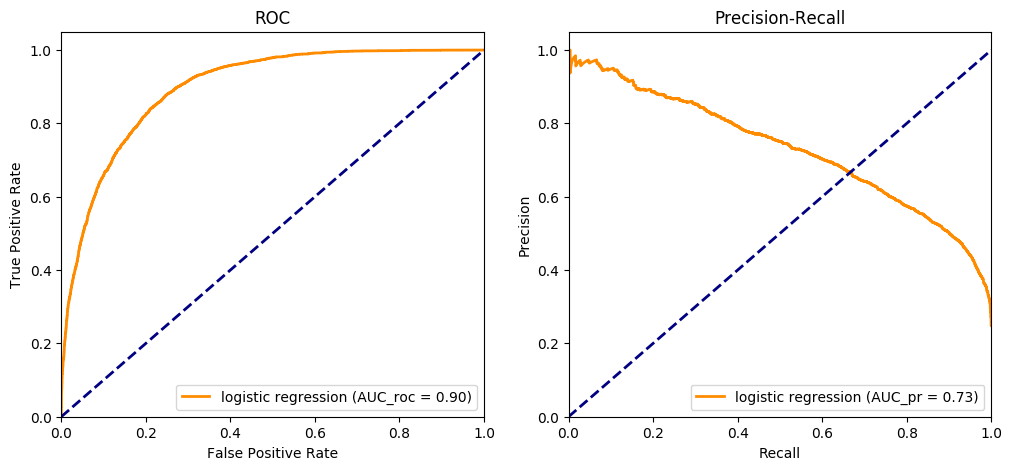

In [37]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
from optimizer import sigma, expand_constant

# ROC curve
pred_y = LRM.predict(X_test.to_numpy())
fpr, tpr, thresholds = roc_curve(y_test.to_numpy().reshape((-1, 1)), pred_y)
roc_auc = auc(fpr, tpr)

# precision recall
precision, recall, _ = precision_recall_curve(y_test.to_numpy().reshape((-1, 1)), pred_y)
pr_auc = auc(recall, precision)

# f1 score
pred_y[np.where(pred_y < 0.5)] = 0
pred_y[np.where(pred_y >= 0.5)] = 1
F1_score = f1_score(y_test.to_numpy().reshape((-1, 1)), pred_y)
print("f1 score: {0}".format(F1_score))

f, ax = plt.subplots(1, 2, figsize = (12, 5))
lw = 2
ax[0].plot(fpr, tpr, color='darkorange',
         lw=lw, label='logistic regression (AUC_roc = {0:.2f})'.format(roc_auc))
ax[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC')
ax[0].legend(loc="lower right")

ax[1].plot(recall, precision, color='darkorange',
         lw=lw, label='logistic regression (AUC_pr = {0:.2f})'.format(pr_auc))
ax[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall')
ax[1].legend(loc="lower right")

plt.show()

# 3. (Problem 1b) Fit logistic regression model with simulated annealing; (Problem 2b) Metrics of the fitted model

In [60]:
from optimizer import linearly_decreasing_temperature, neighbour, acceptance
from functools import partial

LRM2 = Logistic_Regression()

np.random.seed(1)
w0 = np.zeros((X_train.shape[1]+1, 1))
num_iter = 10000
T0 = 1e-3
scale = 1e-2
temperature = partial(linearly_decreasing_temperature, T0 = T0)
neighbour = partial(neighbour, scale = scale)

w, hist = LRM2.fit(solver = "SA",
                   X = X_train.to_numpy(), 
                   y = y_train.to_numpy().reshape((-1, 1)), 
                   w0 = w0, num_iter = num_iter, 
                   temperature = temperature,
                   neighbour = neighbour,
                   acceptance = acceptance,
                   test_X = X_test.to_numpy(), 
                   test_y = y_test.to_numpy().reshape((-1, 1)),
                   debug = True)

Iteration: 0, training loss: 0.693318356251639, accept new state
Iteration: 1000, training loss: 0.3920555721987411, accept new state
Iteration: 2000, training loss: 0.35744455694215893, accept new state
Iteration: 3000, training loss: 0.36050637169659755, accept new state
Iteration: 4000, training loss: 0.3521987457851567, reject new state
Iteration: 5000, training loss: 0.3491132188543082, accept new state
Iteration: 6000, training loss: 0.35095746286454216, reject new state
Iteration: 7000, training loss: 0.34697788848287003, accept new state
Iteration: 8000, training loss: 0.34118815365510885, reject new state
Iteration: 9000, training loss: 0.33671491252401653, accept new state


In [86]:
print(w)

[[-2.10857453e+00]
 [ 3.17783533e-01]
 [ 7.06103939e-02]
 [ 7.73203593e-01]
 [ 5.02416753e-01]
 [ 2.40709785e-01]
 [ 3.91083257e-01]
 [ 1.00465592e-01]
 [-1.08696128e-02]
 [-2.46003693e-02]
 [ 1.64248050e-02]
 [ 5.61341996e-02]
 [-8.98874858e-02]
 [-2.98806079e-02]
 [-6.28804266e-02]
 [-8.62230608e-02]
 [ 3.16342177e-02]
 [ 4.08869104e-01]
 [-3.37232583e-02]
 [-3.30882425e-01]
 [-6.39966656e-02]
 [-2.72985926e-02]
 [-1.59420054e-02]
 [-1.92588226e-02]
 [ 1.53371642e-02]
 [ 2.39864519e-01]
 [-1.74270341e-01]
 [-1.40162155e-01]
 [-8.01326277e-02]
 [-2.44716313e-01]
 [-9.23733638e-02]
 [ 9.50531934e-02]
 [ 6.56768582e-02]
 [ 7.31738576e-02]
 [ 9.17167225e-02]
 [-2.72828370e-02]
 [ 2.12552997e-01]
 [-3.36417803e-02]
 [-8.84829719e-02]
 [-3.41001878e-01]
 [-8.39889613e-02]
 [ 3.49836981e-01]
 [-3.87370043e-02]
 [ 1.66495141e-02]
 [-2.42321446e-02]
 [-3.31369267e-02]
 [ 3.11437969e-02]
 [-1.76422656e-01]
 [ 1.76422656e-01]
 [ 3.26440142e-02]
 [ 1.82984831e-02]
 [-2.46050547e-02]
 [-8.1082194

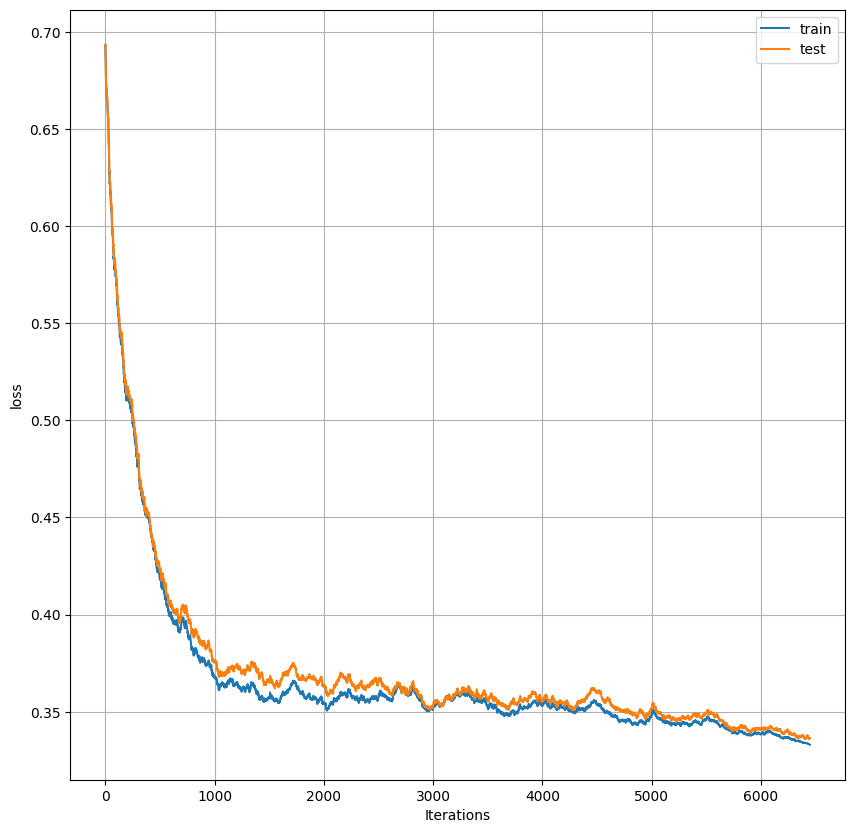

In [61]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

f, ax = plt.subplots(1, 1, figsize = (10, 10))

xx = np.arange(len(hist["train"]))
ax.plot(xx, hist["train"], label = "train")
ax.plot(xx, hist["test"], label = "test")
ax.legend()
ax.grid()
ax.set_xlabel("Iterations")
ax.set_ylabel("loss")
plt.show()

f1 score: 0.6407794813010459


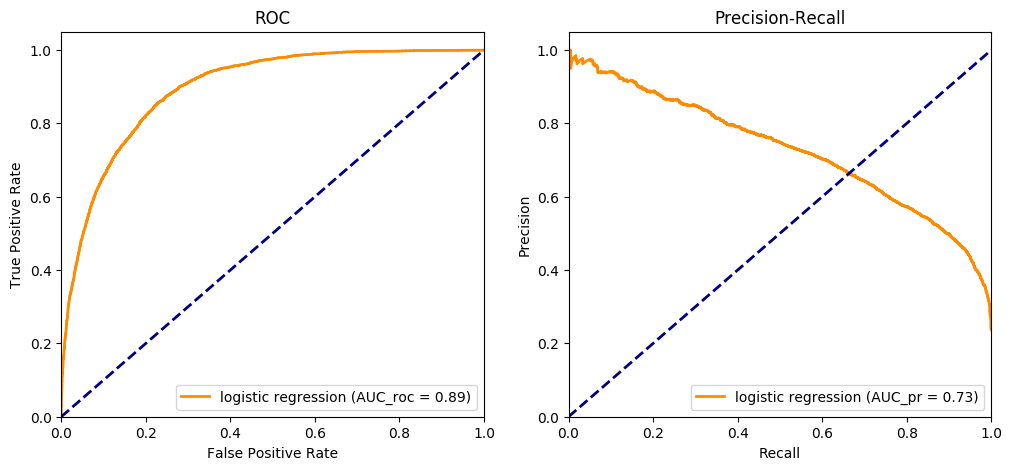

In [62]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
from optimizer import sigma, expand_constant

# ROC curve
pred_y = LRM2.predict(X_test.to_numpy())
fpr, tpr, thresholds = roc_curve(y_test.to_numpy().reshape((-1, 1)), pred_y)
roc_auc = auc(fpr, tpr)

# precision recall
precision, recall, _ = precision_recall_curve(y_test.to_numpy().reshape((-1, 1)), pred_y)
pr_auc = auc(recall, precision)

# f1 score
pred_y[np.where(pred_y < 0.5)] = 0
pred_y[np.where(pred_y >= 0.5)] = 1
F1_score = f1_score(y_test.to_numpy().reshape((-1, 1)), pred_y)
print("f1 score: {0}".format(F1_score))

f, ax = plt.subplots(1, 2, figsize = (12, 5))
lw = 2
ax[0].plot(fpr, tpr, color='darkorange',
         lw=lw, label='logistic regression (AUC_roc = {0:.2f})'.format(roc_auc))
ax[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC')
ax[0].legend(loc="lower right")

ax[1].plot(recall, precision, color='darkorange',
         lw=lw, label='logistic regression (AUC_pr = {0:.2f})'.format(pr_auc))
ax[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall')
ax[1].legend(loc="lower right")

plt.show()

# 4. (Problem 2) Fit Lasso

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train.to_numpy(), y_train.to_numpy().reshape((-1, 1)))
np.where(lasso.coef_ != 0)[0]

array([ 0,  2,  3,  4,  5,  6, 10, 11, 16, 24, 25, 27, 30, 32, 33, 40, 46])

In [84]:
len(np.where(lasso.coef_ != 0)[0])

17

f1 score: 0.5659705358588313


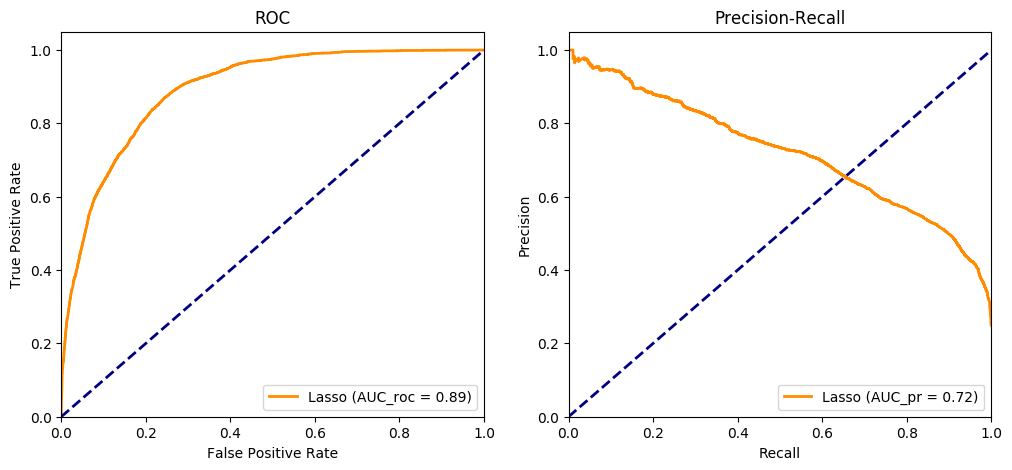

In [89]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
from optimizer import sigma, expand_constant

# ROC curve
pred_y = lasso.predict(X_test.to_numpy())
fpr, tpr, thresholds = roc_curve(y_test.to_numpy().reshape((-1, 1)), pred_y)
roc_auc = auc(fpr, tpr)

# precision recall
precision, recall, _ = precision_recall_curve(y_test.to_numpy().reshape((-1, 1)), pred_y)
pr_auc = auc(recall, precision)

# f1 score
pred_y[np.where(pred_y < 0.5)] = 0
pred_y[np.where(pred_y >= 0.5)] = 1
F1_score = f1_score(y_test.to_numpy().reshape((-1, 1)), pred_y)
print("f1 score: {0}".format(F1_score))

f, ax = plt.subplots(1, 2, figsize = (12, 5))
lw = 2
ax[0].plot(fpr, tpr, color='darkorange',
         lw=lw, label='Lasso (AUC_roc = {0:.2f})'.format(roc_auc))
ax[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC')
ax[0].legend(loc="lower right")

ax[1].plot(recall, precision, color='darkorange',
         lw=lw, label='Lasso (AUC_pr = {0:.2f})'.format(pr_auc))
ax[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall')
ax[1].legend(loc="lower right")

plt.show()

# 5. (Problem 4) Fit Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

# global seed
np.random.seed(1)

rfc = RandomForestClassifier()
rfc.fit(X_train.to_numpy(), y_train.to_numpy())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

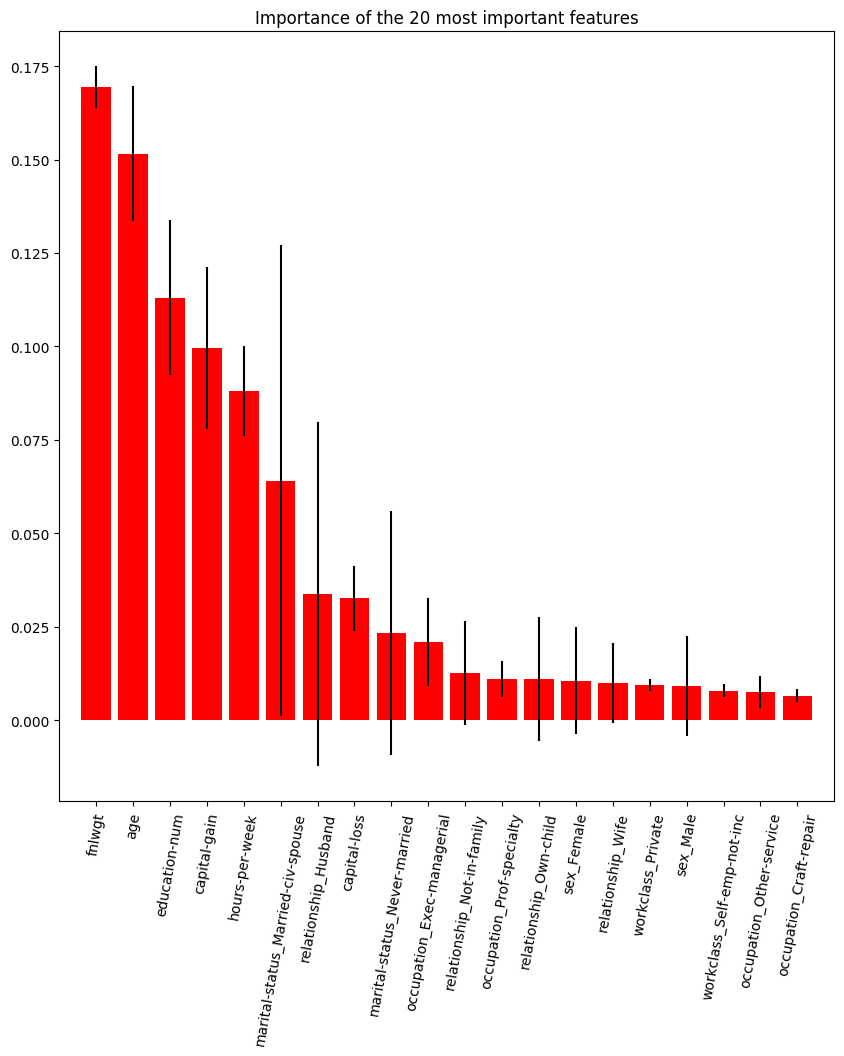

In [82]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis = 0)
indices = np.argsort(importances)[::-1][:20]
names = X_train.columns[indices]

feature_importance = pd.Series(importances[indices], index = names)

plt.rcParams.update(plt.rcParamsDefault)
f, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.bar(np.arange(len(indices)), importances[indices], color = 'r', yerr = std[indices], align = "center")
plt.sca(ax)
plt.xticks(np.arange(len(indices)), names, rotation=80, fontsize = 10)
ax.set_xlim([-1, len(indices)])
ax.set_title("Importance of the {0} most important features".format(len(indices)))
plt.show()

## 5.2 Use Logistic Regression to fit the prediction of Random Forest

In [71]:
LRM3 = Logistic_Regression()

w0 = np.zeros((X_train.shape[1]+1, 1))
num_iter = 10000
lr = 1e-2

w, hist = LRM3.fit(solver = "GD", 
                  X = X_train.to_numpy(), 
                  y = rfc.predict(X_train).reshape((-1, 1)), 
                  w0 = w0, num_iter = num_iter, lr = lr, 
                  test_X = X_test.to_numpy(), 
                  test_y = rfc.predict(X_test).reshape((-1, 1)), 
                  debug = True)

Iteration: 0, training loss: 0.6931471805599453
Iteration: 1000, training loss: 0.360105860388288
Iteration: 2000, training loss: 0.3403319397856531
Iteration: 3000, training loss: 0.3349918168097358
Iteration: 4000, training loss: 0.3329154753053643
Iteration: 5000, training loss: 0.3319532261790065
Iteration: 6000, training loss: 0.3314558127814598
Iteration: 7000, training loss: 0.3311773449954877
Iteration: 8000, training loss: 0.3310111114626508
Iteration: 9000, training loss: 0.3309062891965948


In [80]:
w_features = pd.Series(np.abs(w[1:].flatten()), index = X_train.columns)
w_features.sort_values(ascending = False)[:20]

education-num                        0.773204
capital-gain                         0.502417
marital-status_Married-civ-spouse    0.408869
hours-per-week                       0.391083
relationship_Wife                    0.349837
relationship_Own-child               0.341002
marital-status_Never-married         0.330882
age                                  0.317784
occupation_Other-service             0.244716
capital-loss                         0.240710
occupation_Exec-managerial           0.239865
relationship_Husband                 0.212553
sex_Male                             0.176423
sex_Female                           0.176423
occupation_Farming-fishing           0.174270
occupation_Handlers-cleaners         0.140162
workclass_Federal-gov                0.100466
occupation_Prof-specialty            0.095053
occupation_Priv-house-serv           0.092373
occupation_Tech-support              0.091717
dtype: float64

In [83]:
feature_importance

fnlwgt                               0.169417
age                                  0.151532
education-num                        0.113096
capital-gain                         0.099647
hours-per-week                       0.088008
marital-status_Married-civ-spouse    0.064103
relationship_Husband                 0.033693
capital-loss                         0.032675
marital-status_Never-married         0.023313
occupation_Exec-managerial           0.020880
relationship_Not-in-family           0.012630
occupation_Prof-specialty            0.011078
relationship_Own-child               0.010975
sex_Female                           0.010540
relationship_Wife                    0.009972
workclass_Private                    0.009350
sex_Male                             0.009165
workclass_Self-emp-not-inc           0.007868
occupation_Other-service             0.007607
occupation_Craft-repair              0.006567
dtype: float64